Objetivo: separar objetos de interesse utilizando aprendizado de máquina com lógica Fuzzy C means, que permite graus de pertinência.


In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plot 
import skimage
import skimage.exposure

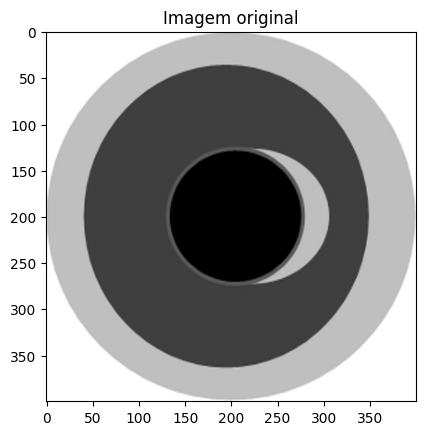

In [2]:
image = cv2.imread(r"C:\Unifesp\redes_neurais\segmentacao_por_reconhecimento_de_padrao\ImagemFuzzyCluster01.pgm",0)
image = skimage.img_as_float(image)
(M,N) = np.shape(image)
plot.figure()
plot.title('Imagem original')
plot.imshow(image, cmap = 'gray')

In [3]:
# Selecionar região de interesse
roi = cv2.selectROI(image)

# Dimensões da área selecionada
# [ x, y, largura, altura]
cmin = roi[0]
lmin = roi[1]
cmax = roi[0] + roi[2]
lmax = roi[1] + roi[3]

print(f'Cmin: {cmin}\nLmin: {lmin}\nCmax: {cmax}\nLmax: {lmax}')

Cmin: 168
Lmin: 107
Cmax: 230
Lmax: 165


Segmentação semi-automática: para criar a semente, o ponto de referência espacial será o central da ROI.

In [4]:
semente_linha = int(lmin + roi[3]/2)
semente_coluna = int(cmin + roi[2]/2)
print(f'Linha média da ROI: {semente_linha}\nColuna média ROI: {semente_coluna}')

Linha média da ROI: 136
Coluna média ROI: 199


Grau de pertinência intensidade

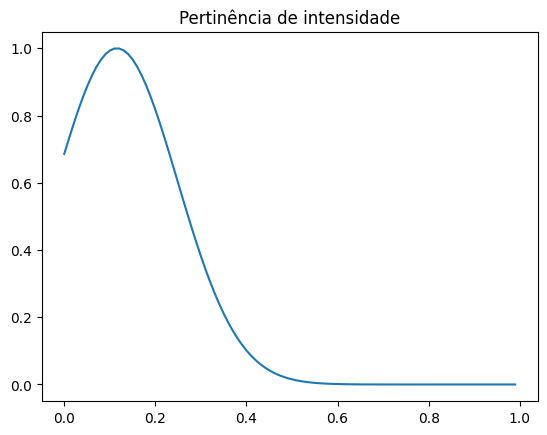

In [5]:
# Utilizando função gaussiana
media_roi_intens = np.mean(image[lmin:lmax, cmin:cmax])
dp_roi_intens = np.std(image[lmin:lmax, cmin:cmax])
valores_intensidade = np.arange(0,1, 0.01)

# Função de pertinência retornará números entre 0 e 1
funcao_pert_gauss = np.exp(-0.5*((valores_intensidade-media_roi_intens)/dp_roi_intens)**2)
plot.figure()
plot.title('Pertinência de intensidade')
plot.plot(valores_intensidade, funcao_pert_gauss)

# Observação: eixo x representa a intensidade de pixel entre 0 e 1 e o eixo y representa o grau de pertinência de intensidade. Aqueles valores de pixels que estão próximos ao valores da média da ROI, estão próximos de 1 como grau de pertinência.

Pertinência a distância

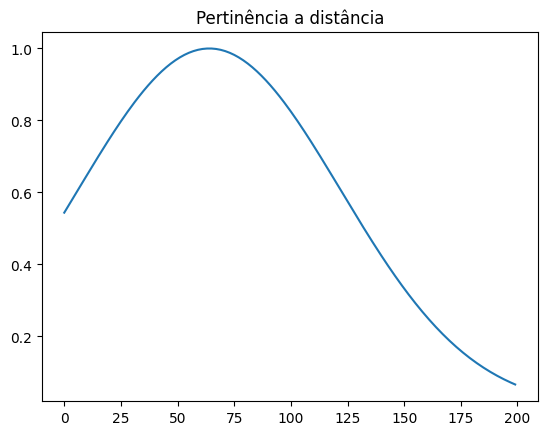

In [6]:
# Distância euclidiana entre o centro da imagem e o centro da ROI.
media_dist_roi = np.sqrt((200-semente_linha)**2 + (200-semente_coluna)**2)
dpdist_roi = np.min([roi[2],roi[3]])
valores_distancia = np.arange(0,200,1)

# Função pertinência distância
fun_pert_dist = np.exp(-0.5*((valores_distancia-media_dist_roi)/dpdist_roi)**2)

plot.figure()
plot.title('Pertinência a distância')
plot.plot(valores_distancia,fun_pert_dist)

Matrizes de atributos

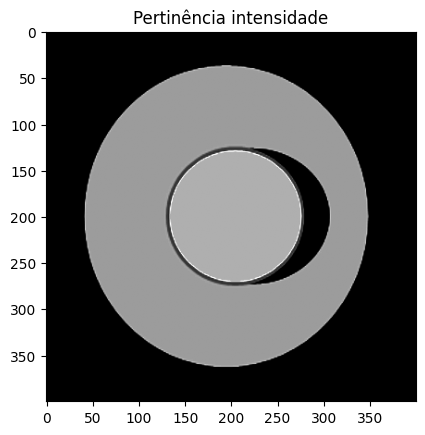

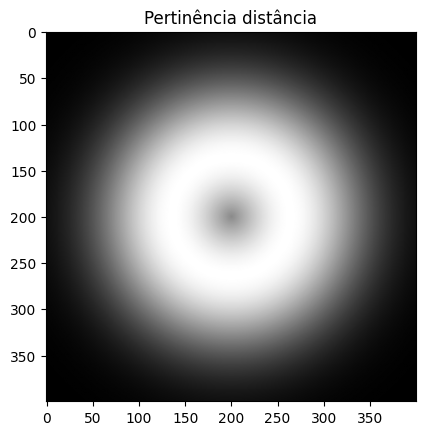

: 

In [ ]:
img_pert_intensidade = np.zeros((M,N), dtype = float)
img_pert_distancia = np.zeros((M,N), dtype = float)

# Matriz para percorrer todos os pixels da imagem
for m in range(M):
    for n in range(N):
      # Pertinência intensidade - pixel da imagem em relação a ROI
      img_pert_intensidade[m,n] = np.exp(-0.5*((image[m,n] - media_roi_intens)/dp_roi_intens)**2)
    
      # Pertinência distância - distância espacial do pixel em relação ao centro da imagem.
      dist_linha = m - (M/2)
      dist_coluna = n - (N/2)
      # Distância será o módulo
      distancia = (dist_linha**2 + dist_coluna**2)**0.5
      img_pert_distancia[m,n] = np.exp(-0.5*((distancia - media_dist_roi)/dpdist_roi)**2)
    
plot.figure()
plot.title('Pertinência intensidade')
plot.imshow(img_pert_intensidade, cmap = 'gray')

plot.figure()
plot.title('Pertinência distância')
plot.imshow(img_pert_distancia, cmap = 'gray')
